# Predicting Life Satisfaction Index

_Builds simple models to predict life satisfaction index of a country considering data from OECD website (https://www.oecdbetterlifeindex.org/) and World Bank statistics (https://ourworldindata.org/)._

In [ ]:
# Imports required packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

## Retrieving & Analyzing the Data

In [ ]:
# Loads and displays the data
life_sat_index = pd.read_csv("./../data/lifesat.csv")

display(life_sat_index)

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


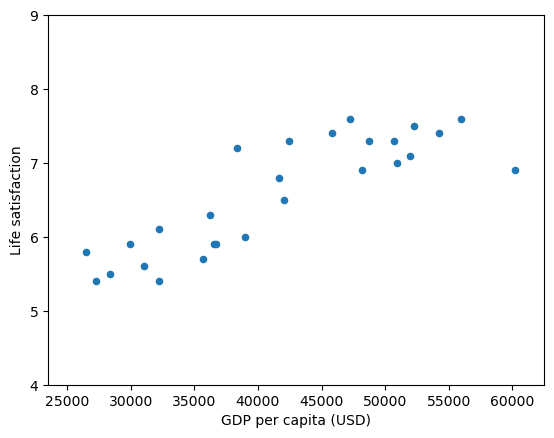

In [ ]:
# Prepares and visualizes the data

X = life_sat_index[["GDP per capita (USD)"]].values
y = life_sat_index[["Life satisfaction"]].values

life_sat_index.plot(kind='scatter', x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23500, 62500, 4, 9])
plt.show()

## Modeling

### Model-based Approach
Considers a simple linear model with equation 

$life\_sat\_index = \theta_0+\theta_1*GDP\_per\_capita$

where $\theta_0$ and $\theta_1$ represent intersect and slope, respetively.

In [ ]:
# Initializes a simple linear model
lin_reg = LinearRegression()

# Fits the linear model
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
# Prints parameters of the trained linear model

print("Intercept:", lin_reg.intercept_, ", Slope:", lin_reg.coef_)

print("\nFormated Output: Intercept: {0:.2f}, Slope: {1:.2e}".format(lin_reg.intercept_[0], lin_reg.coef_[0][0]))

Intercept: [3.74904943] , Slope: [[6.77889969e-05]]

Formateed Output: Intercept: 3.75, Slope: 6.78e-05


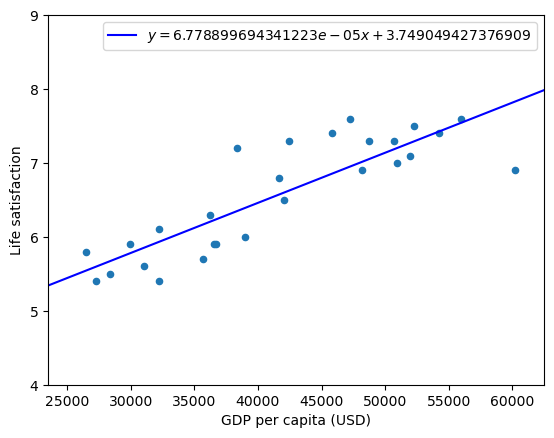

In [ ]:
# Visualizes the fitted linear model

# First, plots all the data points
life_sat_index.plot(kind='scatter', x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23500, 62500, 4, 9])

# Extracts slope and intercept
m = lin_reg.coef_[0][0]
c = lin_reg.intercept_[0]

# Plots the line directly with slope and intersect
plt.axline(xy1=(0, c), slope=m, color="blue", label=f'$y={m}x {c:+}$')

# Shows the linear model equation by enabling legend
plt.legend()

# Finally, renders the plot
plt.draw()

In [ ]:
# Now, makes a prediction for life satisfaction index for country Cyprus using trained linear model

X_test = [[37_655.2]]  # Consider it as Cyprus' GDP per capita in 2020
y_predictions = lin_reg.predict(X_test)

# Prints the predictions
print(y_predictions)

[[6.30165767]]


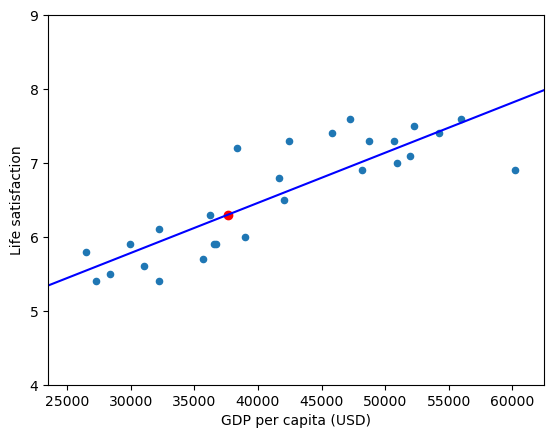

In [ ]:
# Visualizes the prediction to check if it falls on the trained straight line

# Once again, plots all the data points and then the line for linear model
life_sat_index.plot(kind='scatter', x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23500, 62500, 4, 9])

plt.axline(xy1=(0, c), slope=m, color="blue", label=f'$y={m}x {c:+}$')

# Now, plots the predictions
plt.scatter(
    X_test,
    y_predictions,
    c=np.array(["red"])
)

plt.show()

###  Instance-based Modeling Approach

In [ ]:
# Initializes k-nearest neighbors regression algorithm,
knn_reg = KNeighborsRegressor(n_neighbors = 3)

# and fits the model
knn_reg.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Now, makes a prediction for life satisfaction index for the same country using instance-based model
y_predictions = knn_reg.predict(X_test)

# Prints the predictions
print(y_predictions)

[[6.33333333]]


In the above mentioned _k_-NN algorithm, parameters $n\_neighbors$ with value 3 considers three nearby countries with GDP closest to that of the Cyprus, and then it calcuates the average of life satisfaction index values for these countries to predict the same for Cypus. In this case, it finds Israel, Lithuania and Slovenia are the closest with GDP 7.2, 5.9 and 5.9, respectively. Hence the average is found to be 6.33 and is considered as predicted value.